In [7]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [9]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [11]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [12]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color Conversion BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # make predictions
    image.flags.writeable = True                   # Image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color Conversion RGB 2 BGR
    return image, results

In [13]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) #draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw right hand connections

In [14]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(48,206,117), thickness=1, circle_radius=1), 
                              mp_drawing.DrawingSpec(color=(48,164,88), thickness=1, circle_radius=1)
                             )
    #draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    #draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(121,44,220), thickness=2, circle_radius=2)
                             ) 
    #draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,0), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(245,90,230), thickness=2, circle_radius=2)
                             ) 
#draw right hand connections

In [197]:
cap = cv2.VideoCapture(0)
# Set mediapipe model       #change to make detection confidence higher  #change to make tracking confidence higher
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        #Read feed
        ret, frame = cap.read()
        
        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
    
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [198]:
draw_landmarks(frame, results)

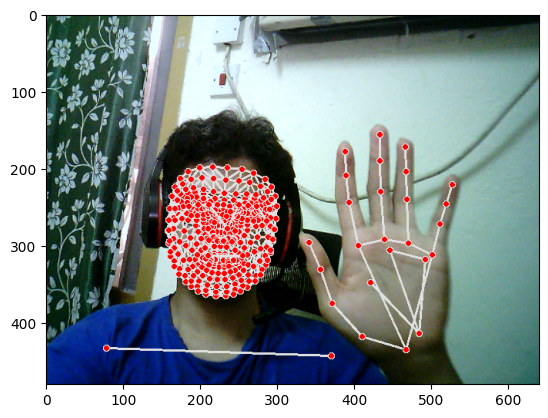

In [199]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [200]:
len(results.left_hand_landmarks.landmark)

21

In [21]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [22]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [26]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [201]:
result_test = extract_keypoints(results)

In [202]:
result_test

array([ 0.36829665,  0.58064193, -0.96137536, ...,  0.        ,
        0.        ,  0.        ])

In [203]:
np.save('0', result_test)

In [204]:
np.load('0.npy')

array([ 0.36829665,  0.58064193, -0.96137536, ...,  0.        ,
        0.        ,  0.        ])

In [205]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# 30 videos worth of data
no_sequences = 30

#Videos are going to be 30 frames in length
sequence_length = 30

#Folder start
start_folder = 30

In [206]:
for action in actions:
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

In [25]:
cap = cv2.VideoCapture(0)
# Set mediapipe model       #change to make detection confidence higher  #change to make tracking confidence higher
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    #New loop
    #loop through actions
    for action in actions:
        #loop through sequences aka vids
        for sequence in range(start_folder, start_folder+no_sequences):
            #loop through vid length aka sequence length
            for frame_num in range(sequence_length):
    
                #Read feed
                ret, frame = cap.read()
                
                #Make detections
                image, results = mediapipe_detection(frame, holistic)
        
                #Draw landmarks
                draw_styled_landmarks(image, results)

                #New Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #Show to screen
                    cv2.imshow('OpenCV Feed', image)

                #New Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                #Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [83]:
label_map = {label:num for num, label in enumerate(actions)}

In [84]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [85]:
sequences, labels = [], []
for action in actions:
    for sequence in range(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [107]:
np.array(sequences).shape

(90, 30, 1662)

In [108]:
np.array(labels).shape

(90,)

In [109]:
X = np.array(sequences)

In [110]:
X.shape

(90, 30, 1662)

In [111]:
y = to_categorical(labels).astype(int)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [115]:
y_test.shape

(5, 3)

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [117]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [145]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [146]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [122]:
model.fit(X_train, y_train, epochs=1200, callbacks=[tb_callback])

Epoch 1/1200
3/3 [==============================] - 4s 116ms/step - loss: 2.0650 - categorical_accuracy: 0.3294
Epoch 2/1200
3/3 [==============================] - 0s 109ms/step - loss: 2.8370 - categorical_accuracy: 0.2941
Epoch 3/1200
3/3 [==============================] - 0s 113ms/step - loss: 2.0458 - categorical_accuracy: 0.3176
Epoch 4/1200
3/3 [==============================] - 0s 102ms/step - loss: 3.7879 - categorical_accuracy: 0.4471
Epoch 5/1200
3/3 [==============================] - 0s 102ms/step - loss: 8.4356 - categorical_accuracy: 0.3059
Epoch 6/1200
3/3 [==============================] - 0s 110ms/step - loss: 9.6361 - categorical_accuracy: 0.4235
Epoch 7/1200
3/3 [==============================] - 0s 108ms/step - loss: 4.5284 - categorical_accuracy: 0.3882
Epoch 8/1200
3/3 [==============================] - 0s 107ms/step - loss: 19.3508 - categorical_accuracy: 0.3647
Epoch 9/1200
3/3 [==============================] - 0s 101ms/step - loss: 7.2899 - categorical_accuracy

In [123]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_15 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_16 (LSTM)              (None, 64)                49408     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [126]:
res = model.predict(X_test)

1/1 [==============================] - 0s 36ms/step


In [137]:
actions[np.argmax(res[4])]

'hello'

In [138]:
actions[np.argmax(y_test[4])]

'iloveyou'

In [148]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model.load_weights('action.h5')

In [149]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [207]:
yhat = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [158]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [159]:
ytrue

[0,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1]

In [160]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[48,  8],
        [ 0, 29]],

       [[58,  0],
        [ 1, 26]],

       [[55,  1],
        [ 8, 21]]], dtype=int64)

In [161]:
accuracy_score(ytrue, yhat)

0.8941176470588236

In [208]:
from scipy import stats

In [188]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    return output_frame

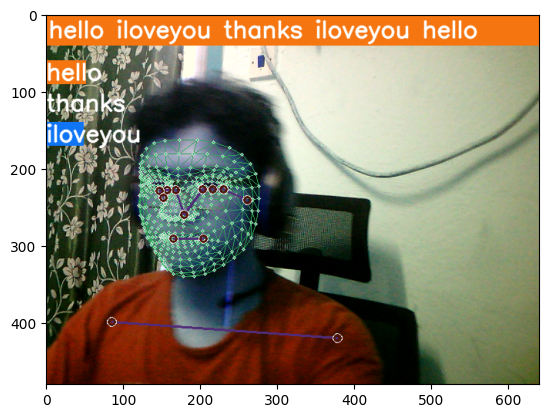

In [189]:
plt.imshow(prob_viz(res, actions, image, colors))

In [193]:
#1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model       #change to make detection confidence higher  #change to make tracking confidence higher
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        #Read feed
        ret, frame = cap.read()
        
        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #Draw landmarks
        draw_styled_landmarks(image, results)

        #2. Prediction Logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
    
            if len(sentence) > 5:
                sentence = sentence[-5:]
    
            #Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        

        
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
    
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [176]:
    cap.release()
    cv2.destroyAllWindows()